### Model performance measurement

#### Confusion Matrix

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

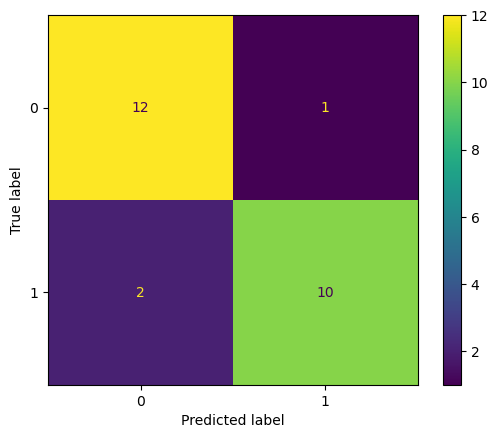

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()


#### F1, Accuracy, Recall, AUC and Precision scores

In [9]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

print(f"Macro f1 score: {f1_score(y_true, y_pred, average='macro')}")

print(f"Micro F1: {f1_score(y_true, y_pred, average='micro')}")

print(f"Weighted Average F1: {f1_score(y_true, y_pred, average='weighted')}")

print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")

y_true = [0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)

# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")


Macro f1 score: 0.26666666666666666
Micro F1: 0.3333333333333333
Weighted Average F1: 0.26666666666666666
F1 No Average: [0.8 0.  0. ]
F1 No Average: [0.66666667 1.         0.66666667]


In [11]:
 from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [13]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [15]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [17]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])


0.9948073569050262

In [21]:
#multiclass case
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

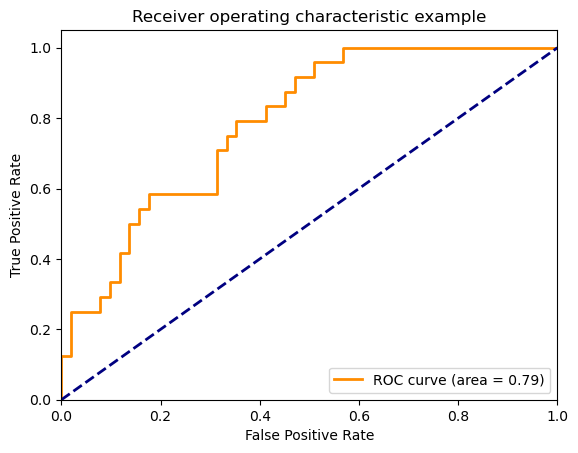

In [25]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


In [27]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

### Regression metrics

#### RMSE

In [31]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

#### MAE

In [34]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

#### r squared

In [37]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.9486081370449679

## original whole code

True Negatives: 0, False Positives: 2, False Negatives: 1, True Positives: 1


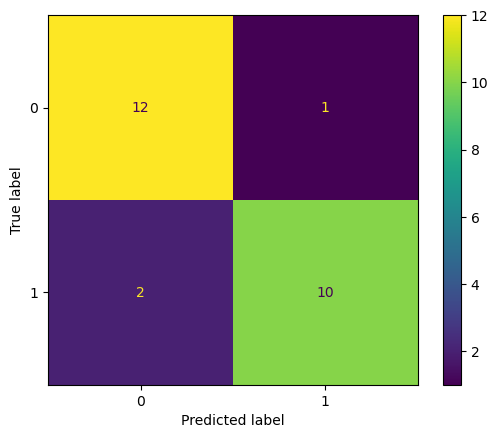

Accuracy: 0.3333333333333333
Precision (macro): 0.2222222222222222
Recall (macro): 0.3333333333333333
              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         2
     class 2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6

ROC AUC Score (Breast Cancer): 0.9948073569050262
Multiclass ROC AUC Score (Iris): 0.9913333333333334


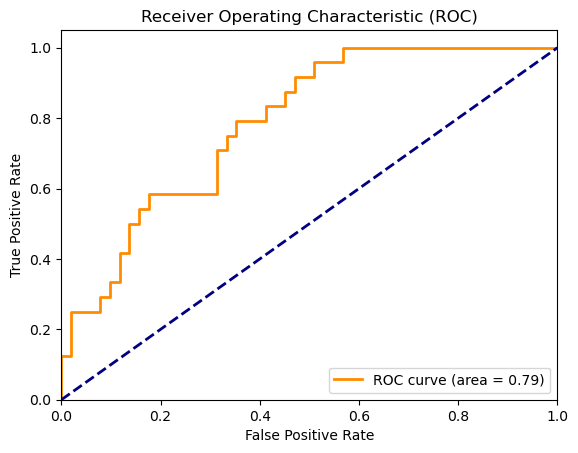

Log Loss: 0.21616187468057912
Mean Squared Error: 0.375
Mean Absolute Error: 0.5
R-squared: 0.9486081370449679


In [88]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, 
    roc_curve, auc, log_loss, mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

# PART 1: Confusion Matrix
# Generate confusion matrix from actual vs predicted values
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# PART 2: Confusion Matrix for a Classifier
# Create synthetic data for classification
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train an SVC model
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Confusion Matrix and Visualization
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# PART 3: Accuracy, Precision, and Recall
# Example of calculating accuracy, precision, and recall
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

# Precision (macro)
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro')}")

# Recall (macro)
print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro')}")

# PART 4: Classification Report
# Class-level performance metrics
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

# PART 5: ROC AUC Score (Binary Classification)
# Load breast cancer dataset and compute AUC
X, y = load_breast_cancer(return_X_y=True)
clf_log = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(f"ROC AUC Score (Breast Cancer): {roc_auc_score(y, clf_log.predict_proba(X)[:, 1])}")

# PART 6: Multiclass ROC AUC Score (Iris Dataset)
# Load iris dataset and compute multiclass AUC
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
print(f"Multiclass ROC AUC Score (Iris): {roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')}")

# PART 7: Multiclass ROC Curve with Noisy Features
# Add noisy features to iris dataset and train model
iris = load_iris()
X = iris.data
y = iris.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# One-vs-Rest Classifier (SVC)
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for class 2
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# PART 8: Additional Metrics (Log Loss, Mean Squared Error, etc.)
# Log Loss Example
log_loss_result = log_loss(["spam", "ham", "ham", "spam"], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])
print(f"Log Loss: {log_loss_result}")

# Mean Squared Error Example
y_true_mse = [3, -0.5, 2, 7]
y_pred_mse = [2.5, 0.0, 2, 8]
print(f"Mean Squared Error: {mean_squared_error(y_true_mse, y_pred_mse)}")

# Mean Absolute Error Example
print(f"Mean Absolute Error: {mean_absolute_error(y_true_mse, y_pred_mse)}")

# R-squared Example
print(f"R-squared: {r2_score(y_true_mse, y_pred_mse)}")


### changed classification type

ROC AUC Score (RandomForest): 0.8942307692307692


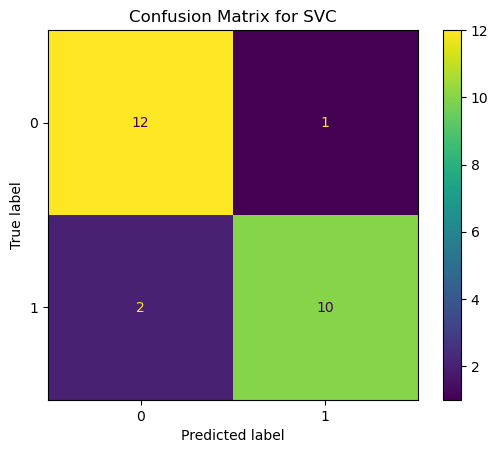

Accuracy: 0.5
Precision (macro): 0.2222222222222222
Recall (macro): 0.3333333333333333
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

ROC AUC Score (Breast Cancer): 0.9948073569050262
Multiclass ROC AUC Score (Iris): 0.9913333333333334


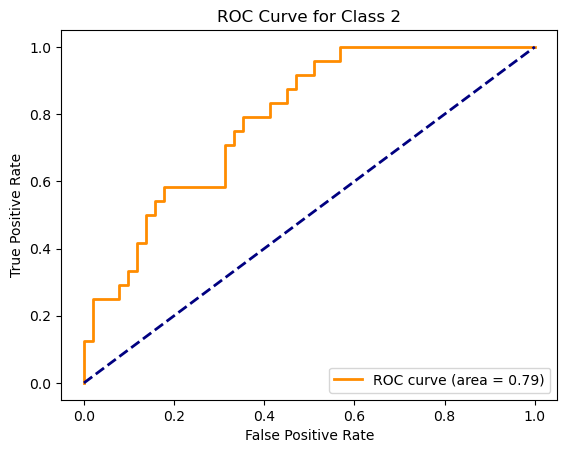

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Binary Classification with Confusion Matrix and AUC
# Generate synthetic data
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# RandomForestClassifier example
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)

# AUC Score for RandomForestClassifier
print("ROC AUC Score (RandomForest):", roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]))

# SVC example
clf_svc = SVC(probability=True, random_state=0)
clf_svc.fit(X_train, y_train)
predictions_svc = clf_svc.predict(X_test)

# Confusion Matrix for SVC
cm = confusion_matrix(y_test, predictions_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for SVC")
plt.show()

# Part 2: Metrics for Multi-class Classification
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print("Accuracy:", accuracy_score(y_true, y_pred))

y_true_multi = [0, 1, 2, 0, 1, 2]
y_pred_multi = [0, 2, 1, 0, 0, 1]
print("Precision (macro):", precision_score(y_true_multi, y_pred_multi, average="macro"))
print("Recall (macro):", recall_score(y_true_multi, y_pred_multi, average="macro"))

y_true_class = [0, 1, 2, 2, 2]
y_pred_class = [0, 0, 2, 2, 1]
target_names = ["class 0", "class 1", "class 2"]
print(classification_report(y_true_class, y_pred_class, target_names=target_names))

# Part 3: Breast Cancer Dataset AUC
X, y = load_breast_cancer(return_X_y=True)
clf_log = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print("ROC AUC Score (Breast Cancer):", roc_auc_score(y, clf_log.predict_proba(X)[:, 1]))

# Part 4: Multiclass AUC with Iris Dataset
X, y = load_iris(return_X_y=True)
clf_multi = LogisticRegression(solver="liblinear").fit(X, y)
print("Multiclass ROC AUC Score (Iris):", roc_auc_score(y, clf_multi.predict_proba(X), multi_class="ovr"))

# Part 5: Multiclass ROC Curve with Noisy Features
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# One-vs-Rest Classifier
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for class 2
plt.figure()
plt.plot(fpr[2], tpr[2], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Class 2")
plt.legend(loc="lower right")
plt.show()


### changed regression type

ROC AUC Score (RandomForest): 0.8942307692307692


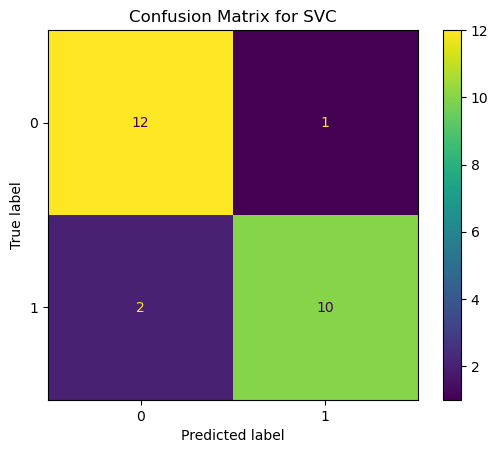

Accuracy: 0.5
Precision (macro): 0.2222222222222222
Recall (macro): 0.3333333333333333
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

ROC AUC Score (Breast Cancer): 0.9948073569050262
Multiclass ROC AUC Score (Iris): 0.9913333333333334


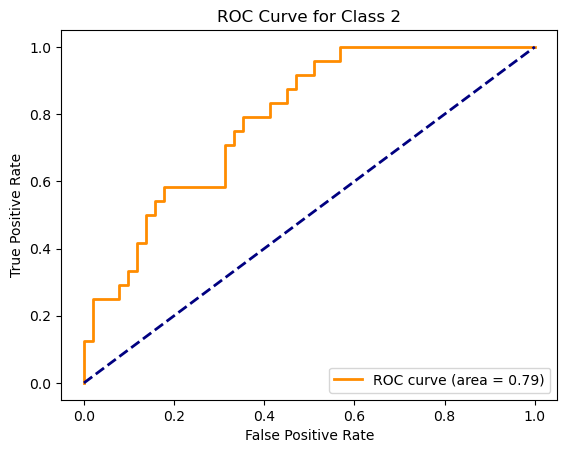

Mean Squared Error (Random Forest Regression): 5547.928998259484
R^2 Score (Random Forest Regression): 0.6950136667280703


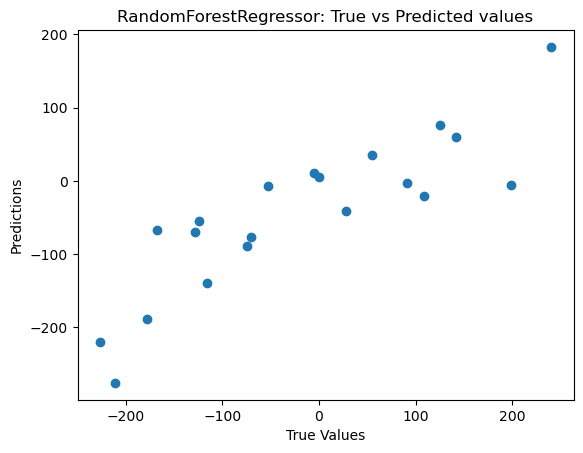

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_breast_cancer, load_iris, make_regression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Binary Classification with Confusion Matrix and AUC
# Generate synthetic data for binary classification
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# RandomForestClassifier example
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)

# AUC Score for RandomForestClassifier
print("ROC AUC Score (RandomForest):", roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]))

# SVC example
clf_svc = SVC(probability=True, random_state=0)
clf_svc.fit(X_train, y_train)
predictions_svc = clf_svc.predict(X_test)

# Confusion Matrix for SVC
cm = confusion_matrix(y_test, predictions_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for SVC")
plt.show()

# Part 2: Metrics for Multi-class Classification
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print("Accuracy:", accuracy_score(y_true, y_pred))

y_true_multi = [0, 1, 2, 0, 1, 2]
y_pred_multi = [0, 2, 1, 0, 0, 1]
print("Precision (macro):", precision_score(y_true_multi, y_pred_multi, average="macro"))
print("Recall (macro):", recall_score(y_true_multi, y_pred_multi, average="macro"))

y_true_class = [0, 1, 2, 2, 2]
y_pred_class = [0, 0, 2, 2, 1]
target_names = ["class 0", "class 1", "class 2"]
print(classification_report(y_true_class, y_pred_class, target_names=target_names))

# Part 3: Breast Cancer Dataset AUC
X, y = load_breast_cancer(return_X_y=True)
clf_log = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print("ROC AUC Score (Breast Cancer):", roc_auc_score(y, clf_log.predict_proba(X)[:, 1]))

# Part 4: Multiclass AUC with Iris Dataset
X, y = load_iris(return_X_y=True)
clf_multi = LogisticRegression(solver="liblinear").fit(X, y)
print("Multiclass ROC AUC Score (Iris):", roc_auc_score(y, clf_multi.predict_proba(X), multi_class="ovr"))

# Part 5: Multiclass ROC Curve with Noisy Features
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# One-vs-Rest Classifier
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for class 2
plt.figure()
plt.plot(fpr[2], tpr[2], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Class 2")
plt.legend(loc="lower right")
plt.show()

# Part 6: Regression with RandomForestRegressor
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a RandomForestRegressor
clf_rf_reg = RandomForestRegressor(random_state=0)
clf_rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = clf_rf_reg.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Mean Squared Error (Random Forest Regression): {mse_rf}")
print(f"R^2 Score (Random Forest Regression): {r2_rf}")

# Part 7: (Optional) Visualization of Predictions (Regression)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RandomForestRegressor: True vs Predicted values')
plt.show()
